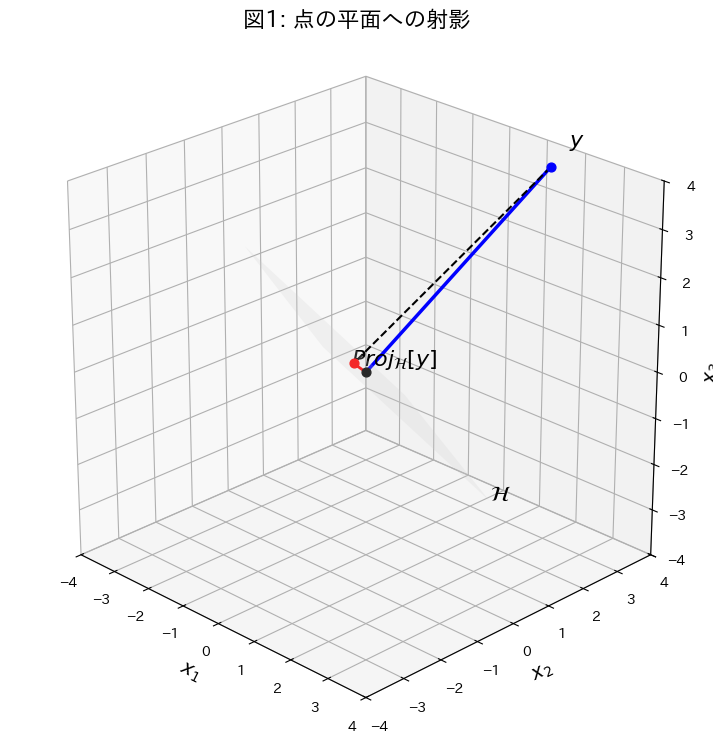

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import japanize_matplotlib

a = np.array([1, 2, 2])
y = np.array([2, 3, 4])
c_scale = 2.5

a_norm = a / np.linalg.norm(a)
#y - <y, a> * a と等価
proj_y = y - np.dot(y, a_norm) * a_norm

# a_normに平行でない一時的なベクトルを定義
temp_vec = np.array([0, 0, 1])
if np.allclose(np.cross(a_norm, temp_vec), 0):
    temp_vec = np.array([0, 1, 0])

# 外積を用いて、平面Hを張る正規直交基底(u2, u3)を計算
u2 = np.cross(a_norm, temp_vec)
u2 /= np.linalg.norm(u2)
u3 = np.cross(a_norm, u2)

# 基底ベクトルと座標から四角形の頂点を計算 
corners = np.array([[1, 1, -1, -1],
                    [1, -1, -1, 1]])
basis_matrix = np.vstack([u2, u3]).T
p = c_scale * basis_matrix @ corners
verts = [list(zip(p[0], p[1], p[2]))]


#描画
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')

plane_surface = Poly3DCollection(verts, alpha=0.2, facecolor='#cccccc')
ax.add_collection3d(plane_surface)

ax.scatter(0, 0, 0, color='black', s=40, label='Origin (O)')
ax.scatter(y[0], y[1], y[2], color='blue', s=40)
ax.scatter(proj_y[0], proj_y[1], proj_y[2], color='red', s=40)

ax.plot([0, y[0]], [0, y[1]], [0, y[2]], color='blue', lw=2.5)
ax.plot([0, proj_y[0]], [0, proj_y[1]], [0, proj_y[2]], color='red', lw=2)

ax.plot([y[0], proj_y[0]], [y[1], proj_y[1]], [y[2], proj_y[2]], color='black', linestyle='--')

# ラベル
ax.text(y[0] * 1.1, y[1] * 1.1, y[2] * 1.1, r'$y$', size=16, color='k')
ax.text(proj_y[0] * 1.2, proj_y[1] * 1.2, proj_y[2], r'$Proj_{\mathcal{H}}[y]$', size=16, color='k')
ax.text(p[0, 0], p[1, 0], p[2, 0], r'$\mathcal{H}$', size=16, color='k')


ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$x_3$', fontsize=14)
ax.set_title('図1: 点の平面への射影', fontsize=16)

# 軸の範囲とアスペクト比を調整
max_val = np.max(np.abs(np.concatenate([y, proj_y, p.flatten()])))
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)
ax.set_zlim(-max_val, max_val)
ax.set_box_aspect([1, 1, 1])
ax.view_init(elev=25, azim=-45)
plt.show()